In [1]:
import cellrank as cr
import scanpy as sc
import seaborn as sns
from scipy.stats.stats import pearsonr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42

In [2]:
adata = sc.read_h5ad("dt_out/2_invitro_analysis/TF_SC_filtered_feature_bc_matrix_scvelo_preprocessed_7Feb2025.h5ad")

In [4]:
# sc.pp.neighbors(adata)

In [5]:
# sc.tl.umap(adata, random_state = 0)

In [6]:
vk = cr.kernels.VelocityKernel(adata)

In [7]:
vk.compute_transition_matrix()

100%|███████████████████████████████████████████████████████████████████████████| 6963/6963 [00:33<00:00, 206.16cell/s]


VelocityKernel[n=6963, model='deterministic', similarity='correlation', softmax_scale=19.995]

In [8]:
ck = cr.kernels.ConnectivityKernel(adata)
ck.compute_transition_matrix()

ConnectivityKernel[n=6963, dnorm=True, key='connectivities']

In [9]:
combined_kernel = 0.8 * vk + 0.2 * ck

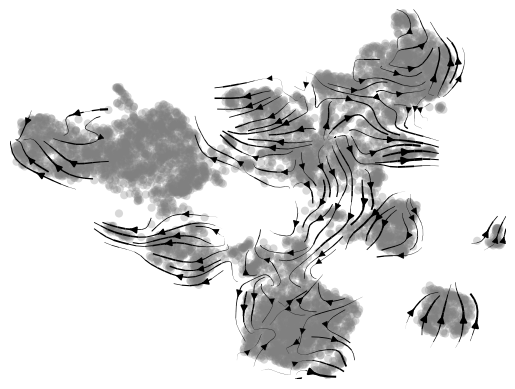

In [10]:
vk.plot_projection()

In [11]:
from cellrank.estimators import GPCCA

g = GPCCA(combined_kernel)
print(g)

GPCCA[kernel=(0.8 * VelocityKernel[n=6963] + 0.2 * ConnectivityKernel[n=6963]), initial_states=None, terminal_states=None]


/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/utils.py:1396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/utils.py:1397: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs)


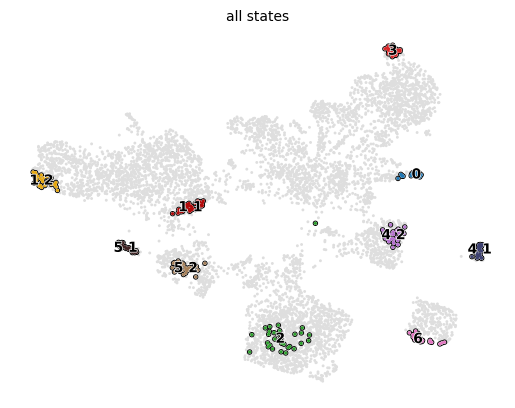

In [12]:
g.fit(n_states=10, cluster_key="leiden_01")
g.plot_macrostates(which="all")

In [28]:
g.predict_terminal_states(method="top_n", n_states=10)
g.plot_macrostates(which="terminal")

/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/utils.py:1396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/utils.py:1397: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs)


Defaulting to `'gmres'` solver.


100%|██████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.15/s]
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


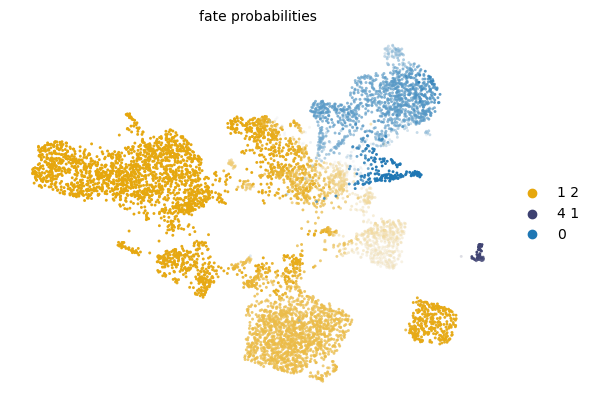

In [14]:
g.compute_fate_probabilities()
g.plot_fate_probabilities(legend_loc="right")

In [15]:
cr.pl.circular_projection(adata, keys="leiden_01", legend_loc="right")

In [22]:
sc.pl.umap(adata, color = ["leiden_01",'SC_genes',"velocity_pseudotime"])

In [ ]:
sc.pl.umap(adata, color = ["leiden_01",'SC_genes',"velocity_pseudotime",'Sox10','Olig2'],
          ncol = 5, )

In [36]:
sc.pl.umap(adata, color = ["leiden_01",'SC_genes',"velocity_pseudotime",'Sox10','Olig2'],frameon=False,
         palette = "tab20b",cmap = "RdPu", save = "_invitro_TF_cluster_SCgenes_velocity_Sox10_Olig2.pdf")

In [19]:
sc_drivers = g.compute_lineage_drivers(lineages="1_2")
sc_drivers.head(10)

1_2_corr  1_2_pval  1_2_qval  1_2_ci_low  1_2_ci_high
Nedd4   0.687990       0.0       0.0    0.675416     0.700164
Map1b   0.621523       0.0       0.0    0.606894     0.635731
Gpm6b   0.588184       0.0       0.0    0.572606     0.603337
Dclk1   0.572834       0.0       0.0    0.556838     0.588406
Fermt2  0.567943       0.0       0.0    0.551815     0.583646
Ptn     0.565092       0.0       0.0    0.548888     0.580870
Rdx     0.556462       0.0       0.0    0.540032     0.572469
Shisa4  0.551082       0.0       0.0    0.534512     0.567229
Hmgn3   0.546413       0.0       0.0    0.529723     0.562680
Prnp    0.542372       0.0       0.0    0.525579     0.558743

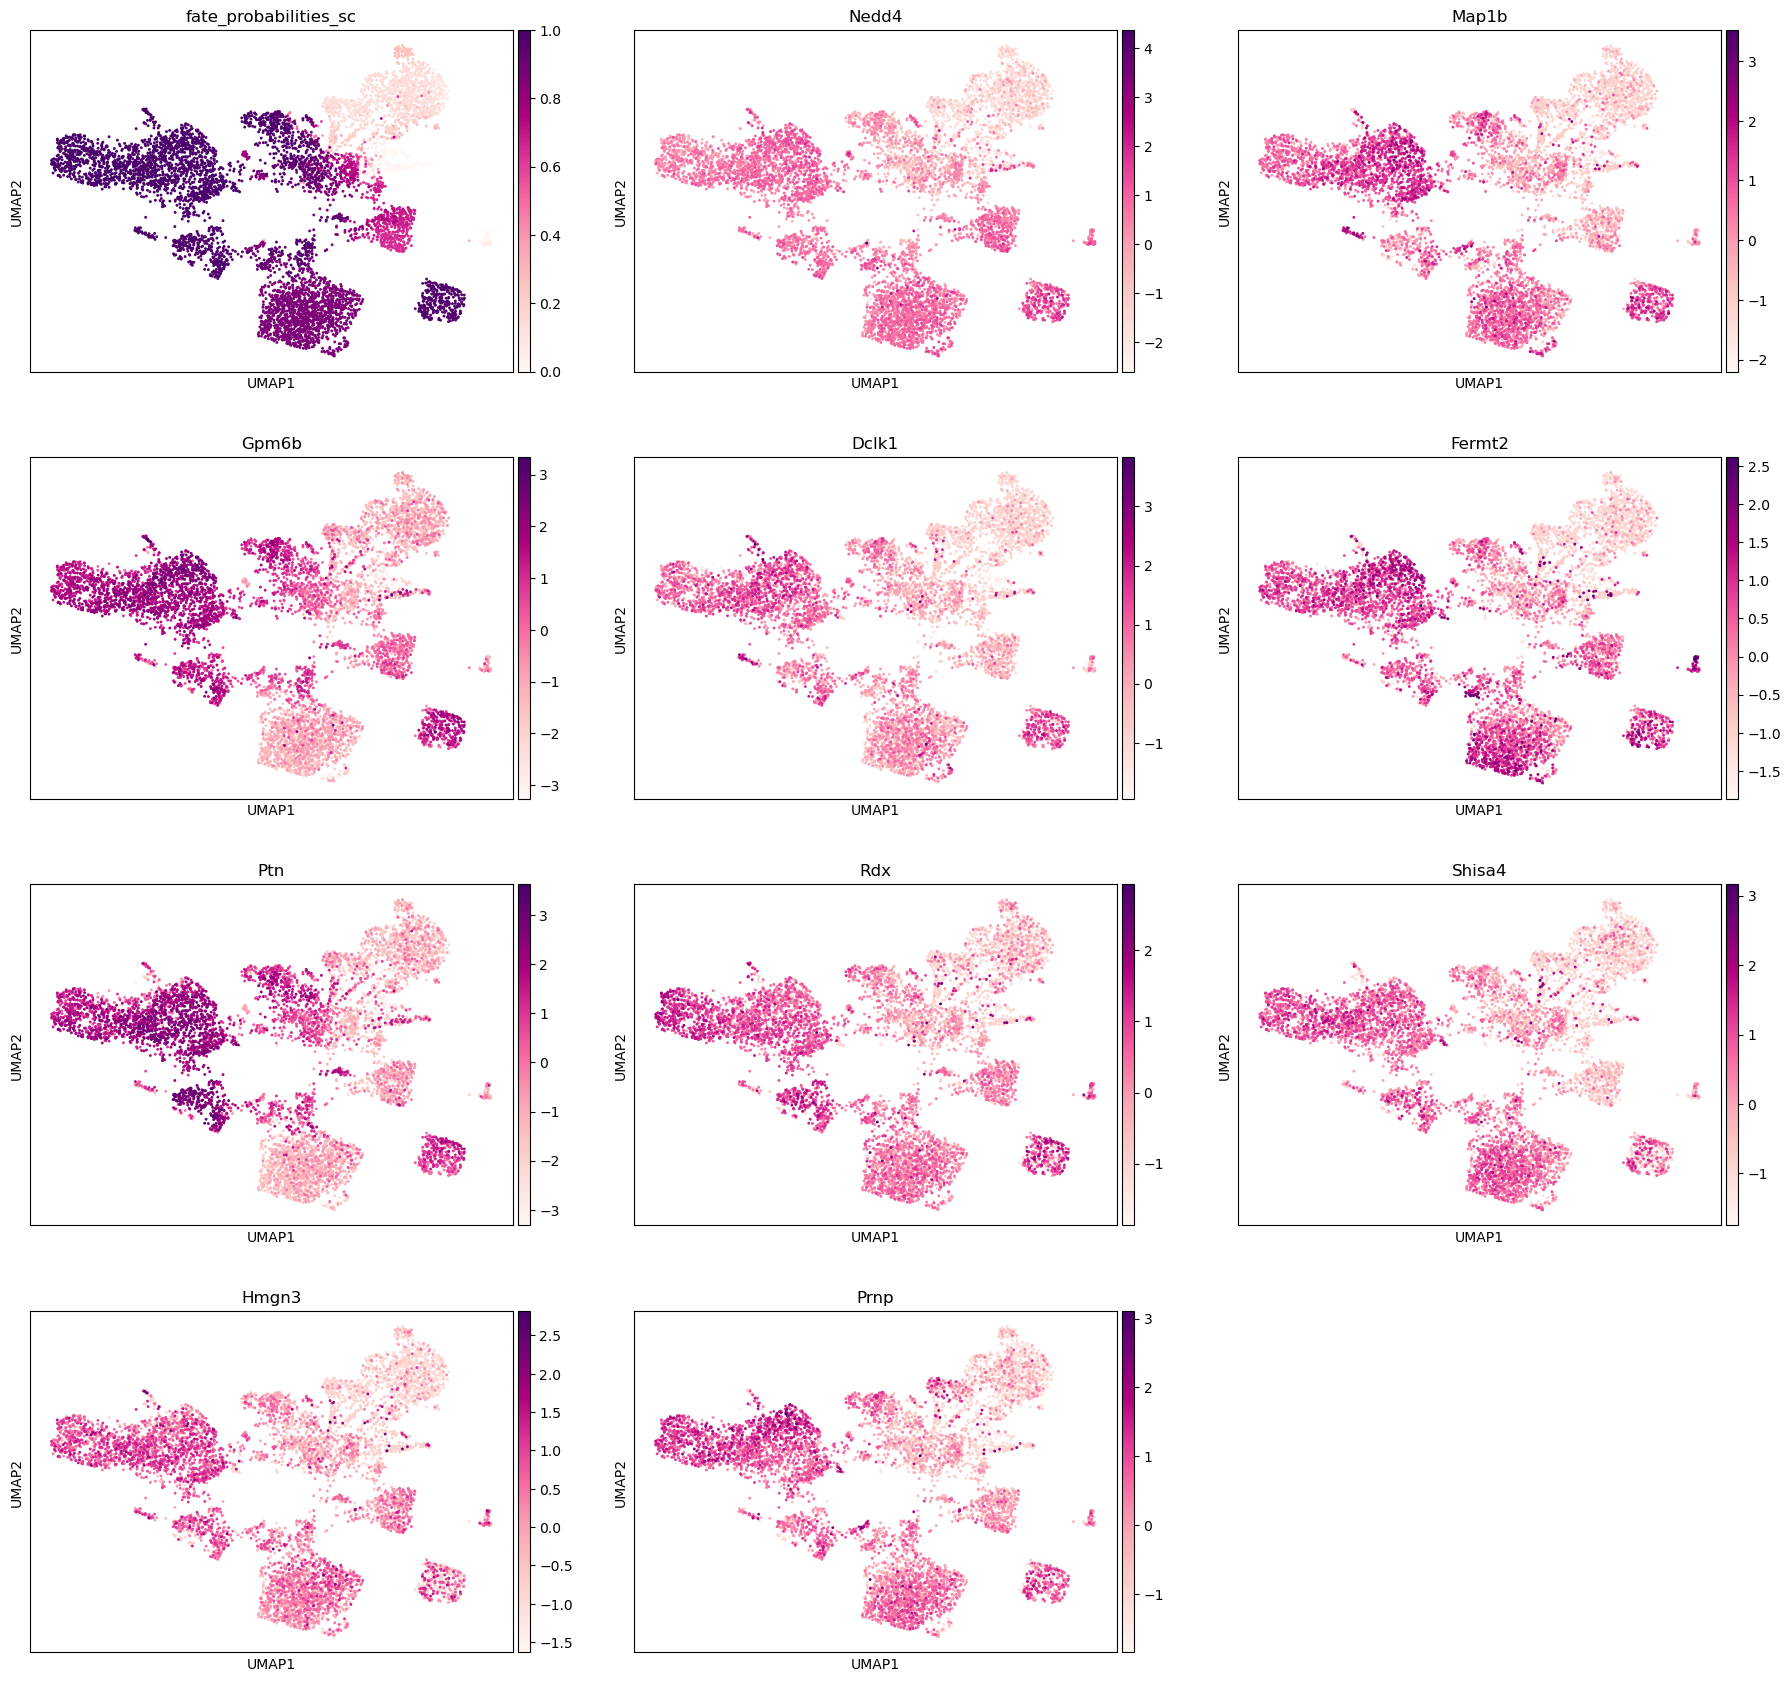

In [21]:
adata.obs["fate_probabilities_sc"] = g.fate_probabilities["1_2"].X.flatten()
sc.pl.embedding(
    adata,
    basis="umap",
    color=["fate_probabilities_sc"] + list(sc_drivers.index[:10]),
    color_map="RdPu",
    # s=50,
    ncols=3,
)

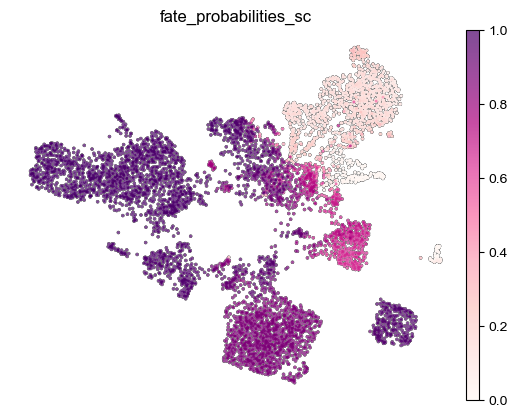

In [37]:
sc.pl.umap(
    adata,
    color=["fate_probabilities_sc"],
    color_map="RdPu",
    frameon=False,
    add_outline = True,
    outline_width = (0.1, 0.001),
    save="_invitro_TF_cellrank_fate_probabilities_sc.pdf"
)

In [16]:
adata.write("dt_out/2_invitro_analysis/invitro_BMP4_combined_post_manual_qc_hvg_norm_log1p_leiden_regressout_with_Annotations_fulldataset_scVelo_cellrank.h5ad")

In [19]:
adata.obs.to_csv("dt_out/2_invitro_analysis/invitro_BMP4_combined_post_manual_qc_hvg_norm_log1p_leiden_regressout_with_Annotations_fulldataset_scVelo_cellrank_obs.csv")


In [18]:
sc_drivers.to_csv("dt_out/2_invitro_analysis/invitro_BMP4_combined_post_manual_qc_hvg_norm_log1p_leiden_regressout_with_Annotations_fulldataset_scVelo_cellrank_SC_driver_genes.csv")

In [44]:
np.sum(adata.obs['leiden_01']=="1")/(len(adata.obs))

0.26324859974149073

In [45]:
contingency  = np.array([[np.sum(adata.obs['leiden_01']=="1"),len(adata.obs)-np.sum(adata.obs['leiden_01']=="1")], [679,8909-679]])

In [47]:
from scipy.stats import chi2_contingency
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=1024.8860155102914, pvalue=6.998564984276866e-225, dof=1, expected_freq=array([[1102.00705645, 5860.99294355],
       [1409.99294355, 7499.00705645]]))

In [53]:
plot  = pd.DataFrame({"TF": [np.sum(adata.obs['leiden_01']=="1")/len(adata.obs)], "BMP": [679/8909]})

In [57]:
fig = sns.barplot(plot).get_figure()
fig.savefig("figures/barplot_percentage_TF_BMP_sc_cluster.pdf") 

In [58]:
sc.tl.rank_genes_groups(adata, groupby = "leiden_01")

In [61]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_01", standard_scale="var", n_genes=10,
    cmap = "RdPu",
    save = "_invitro_TF_rank_genes_groups_dotplot_leiden_01.pdf"
)

In [62]:
gene_list_1 = ['Olig2','Sox10','Olig1','Pdgfra','Cspg4','Myrf']
gene_list_2 = ['Olig2','Sox10','Pdgfra','Cspg4','Ascl1','Plp1','Opalin','Myrf','Mbp','Pou3f1','Mpz','Egr2','Prx','Pmp22']
gene_list_3 = ['Pou3f1','Src','Erbb3','Ntrk2','Itga1','Dag1','Ptn']
cc_genes = list(set(gene_list_1+gene_list_2+gene_list_3))
myelin_genes = ["Mag", "Plp1", "Pou3f1", "Egr2", "Prx", "Mpz", "Pmp22"]
nerve_support = ["Plat", "Gap43", "Erbb3", "Sostdc1", "Bdnf", "Fabp7"]
sc_genes = ["Mbp", "Ngfr", "Nfatc4", "Mpz", "Mog", "Gfap", "Aqp4", "Tgfb1",
               "Pmp22", "Pou3f1", "Sox10"]
relevant_genes = gene_list_1+gene_list_2+gene_list_3+myelin_genes+nerve_support+sc_genes
relevant_genes = list(set(relevant_genes))
marker_genes = {
    "cc_genes": cc_genes,
    "myelin_genes": myelin_genes,
    "nerve_support": nerve_support,
    "sc_genes": sc_genes,

}

sc.pl.dotplot(adata, marker_genes, groupby="leiden_01",cmap = "RdPu",  save="_TF_invitro_cc_myelin_nerve_sc_genes.pdf")



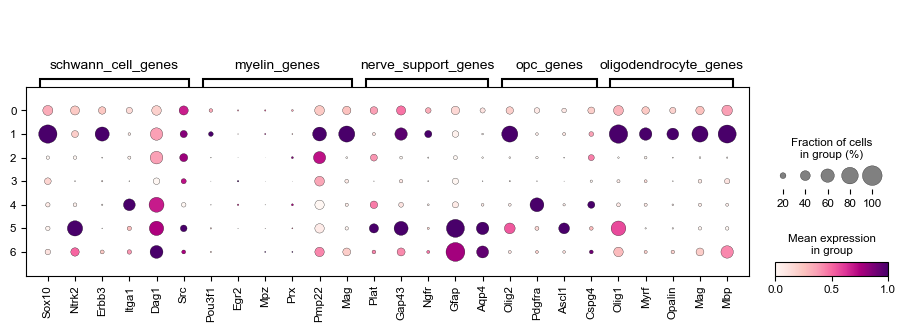

In [3]:

schwann_cell_genes = ["Sox10", "Ntrk2", "Erbb3", "Itga1", "Dag1", "Src"]

myelin_genes = ["Pou3f1", "Egr2", "Mpz", "Prx", "Pmp22", "Mag"]

nerve_support_genes = ["Plat", "Gap43", "Ngfr", "Gfap", "Aqp4"]

opc_genes = ["Olig2", "Pdgfra", "Ascl1", "Cspg4"]

oligodendrocyte_genes = ["Olig1", "Myrf", "Opalin", "Mag", "Mbp"]

marker_genes = {
    "schwann_cell_genes": schwann_cell_genes,
    "myelin_genes": myelin_genes,
    "nerve_support_genes": nerve_support_genes,
    "opc_genes": opc_genes,
    "oligodendrocyte_genes": oligodendrocyte_genes,

}
sc.pl.dotplot(adata, marker_genes, groupby="leiden_01", standard_scale="var",var_group_rotation = 0,cmap = "RdPu", save="TF_cc_myelin_nerve_sc_opc_genes_v2.pdf")